<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Макс, доброго дня! рад приветствовать тебя)<br />
<br />    

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br>

# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### План работ

1. Загрузка и подготовка данные. 
2. Обучение и проверка модель для каждого региона:  
2.1. Разбиение данные на обучающую и валидационную выборки в соотношении 75:25.  
2.2. Обучение модели и предсказания на валидационной выборке.  
2.3. Сохранение предсказаний и правильных ответов на валидационной выборке.  
2.4. Печать на экране среднего запаса предсказанного сырья и RMSE модели.  
2.5. Анализ результатов.  
3. Подготовка к расчёту прибыли:  
3.1. Сохранение всех ключевых значения для расчётов в отдельных переменных.  
3.2. Расчет достаточного объёма сырья для безубыточной разработки новой скважины. Сравнение     полученного объёма сырья со средним запасом в каждом регионе.  
3.3. Выводы по этапу подготовки расчёта прибыли.  
3.4. Написание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели:    
4. Расчеть рисков и прибыли для каждого региона:  
4.1. Применение техники Bootstrap с 1000 выборок, для нахождения распределения прибыли.  
4.2. Нахождение средней прибыли, 95%-й доверительного интервала и риска убытков.  
4.3. Выводы: предложение региона для разработки скважин и обоснование выбора.  

### Описание данных

id — уникальный идентификатор скважины;  
f0, f1, f2 — три признака точек;  
product — объём запасов в скважине (тыс. баррелей);

# 1. Загрузка и подготовка данных

In [1]:
#импорт библиотек и функций
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker
import random

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import mean_squared_error
import warnings

In [3]:
#импорт данных
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
#общая информация о датасете
geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
#общая информация о датасете
geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
#общая информация о датасете
geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Во всех скачанных датасетах нет пропусков.

In [7]:
#вывод датасетов дял обещего ознакомления с данными 
geo_1
#geo_1
#geo_2

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [8]:
#поиск и удаление полных дубликатов
print('Количество полных дубликатов равно для датасета geo_0 равно', geo_0.duplicated().sum())
print('Количество полных дубликатов равно для датасета geo_1 равно', geo_1.duplicated().sum())
print('Количество полных дубликатов равно для датасета geo_2 равно', geo_2.duplicated().sum())
geo_0 = geo_0.drop_duplicates().reset_index(drop = True)
geo_1 = geo_1.drop_duplicates().reset_index(drop = True)
geo_2 = geo_2.drop_duplicates().reset_index(drop = True)

Количество полных дубликатов равно для датасета geo_0 равно 0
Количество полных дубликатов равно для датасета geo_1 равно 0
Количество полных дубликатов равно для датасета geo_2 равно 0


In [9]:
#задание начального значения для генерации последовательности псевдослучайных чисел
random = 12345

***Выводы***  
В исходных данных нет пропусков и дубликатов. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Данные на базе) ОК, хорошо, когда есть аналитическая культура - обязательно делать первичный анализ данных, не смотря на проект) Тут можно ещё графики выводить по факторам и целевым регионов.

# 2. Обучение и проверка модели

2. Обучение и проверка модель для каждого региона:  
2.1. Разбиение данные на обучающую и валидационную выборки в соотношении 75:25.  
2.2. Обучение модели и предсказания на валидационной выборке.  
2.3. Сохранение предсказаний и правильных ответов на валидационной выборке.  
2.4. Печать на экране среднего запаса предсказанного сырья и RMSE модели.  
2.5. Анализ результатов.  

#### 2.1. Разбиение данные на обучающую и валидационную выборки в соотношении 75:25

In [10]:
#список с датасетами данных по регионам
geo = [geo_0, geo_1, geo_2]

#список с названиями датасетов
geo_name = ['geo_0', 'geo_1', 'geo_2']

In [11]:
#список с обучающей и валидационной выборками
train = []
valid = []

#список с признаками для обучающей и валидационной выборок
features_train = []
features_valid = []

#список с целевыми признаками для обучающей и валидационной выборок
target_train = []
target_valid = []

In [12]:
#выделение из данных обучающей и валидационной выборки
for region in geo:
    train_set, valid_set = train_test_split(region, test_size = 0.25, random_state = random)
    
    #задание списков с обучающей и валидационной выборками для регионов
    train.append(train_set)
    valid.append(valid_set)
    
    #задание списков с признаками для обучающей и валидационной выборок для регионов
    features_train_set = train_set.drop(['id','product'], axis = 1)
    features_valid_set = valid_set.drop(['id','product'], axis = 1)
    features_train.append(features_train_set)
    features_valid.append(features_valid_set)
    
    #задание списков с целевыми признаками для обучающей и валидационной выборок для регионов
    target_train_set = train_set['product']
    target_valid_set = valid_set['product']
    target_train.append(target_train_set)
    target_valid.append(target_valid_set)

In [13]:
#вывод долей выборок дял проверки разделения
for i in range(len(geo)):
    print('Датасет', geo_name[i])
    print('Доля тренировочной выборки равна {:.1%}'.format(len(features_train[i])/ len(geo[i])))
    print('Доля валидационной выборки равна {:.1%}'.format(len(features_valid[i])/ len(geo[i])))
    print('Размер датасета (число объектов)', len(geo[i]))
    print()

Датасет geo_0
Доля тренировочной выборки равна 75.0%
Доля валидационной выборки равна 25.0%
Размер датасета (число объектов) 100000

Датасет geo_1
Доля тренировочной выборки равна 75.0%
Доля валидационной выборки равна 25.0%
Размер датасета (число объектов) 100000

Датасет geo_2
Доля тренировочной выборки равна 75.0%
Доля валидационной выборки равна 25.0%
Размер датасета (число объектов) 100000



In [14]:
#проверка разделения выборок
features_valid[0]

,f0,f1,f2
71751,0.948970,-0.057547,2.095727
80493,0.992974,0.206671,-0.142278
2655,1.199854,-0.563356,-1.852991
53233,0.691422,-0.433347,0.564974
91141,0.420772,0.972638,0.736190
...,...,...,...
12581,1.841106,-0.107678,2.585648
18456,0.041859,0.489280,2.168001
73035,0.376389,1.054298,-0.430104
63834,1.071330,-0.470046,4.527099


#### 2.2. - 2.4.  Обучение - предсказание - расчет метрик
 2.2 Обучение модели и предсказания на валидационной выборке;   
 2.3. Сохранение предсказаний и правильных ответов на валидационной выборке;    
 2.4. Печать на экране среднего запаса предсказанного сырья и RMSE модели.  

In [15]:
#список с предскзаниями на валидационной выборке
predictions_valid = []

#список со средним предсказанным сырьем на валидационной выборке
predicted_mean = []

In [16]:
#обучение и предсказание на валидационной выборке
for i in range(len(geo)):
    #задание модели
    regr = LinearRegression(normalize = True)
    
    #обучение модели
    regr.fit(features_train[i], target_train[i])
    
    #получение и сохранение предсказаний на валидационной выборке
    product_pred = regr.predict(features_valid[i])
    product_pred = pd.Series(product_pred, index = features_valid[i].index)
    predictions_valid.append(product_pred)

    print('Регион', geo_name[i])
    # Коэффициенты модели
    #print('Коэффициенты:', regr.coef_)
    
    # Значение метрик MSE, RMSE и средних предсказанных значений
    mean = product_pred.mean()
    predicted_mean.append(mean)
    print('MSE: {:.2f}'.format(mean_squared_error(target_valid[i], product_pred)))
    print('RMSE: {:.2f}'.format(mean_squared_error(target_valid[i], product_pred)**0.5))
    print('Средний предсказанный запас сырья: {:.2f}'.format(mean))
    print()

Регион geo_0
MSE: 1412.21
RMSE: 37.58
Средний предсказанный запас сырья: 92.59

Регион geo_1
MSE: 0.80
RMSE: 0.89
Средний предсказанный запас сырья: 68.73

Регион geo_2
MSE: 1602.38
RMSE: 40.03
Средний предсказанный запас сырья: 94.97



In [17]:
#проверка сохранения предсказаний
predictions_valid[0]

71751     95.894952
80493     77.572583
2655      77.892640
53233     90.175134
91141     70.510088
            ...    
12581    103.037104
18456     85.403255
73035     61.509833
63834    118.180397
43558    118.169392
Length: 25000, dtype: float64

#### 2.5. Анализ результатов

Из расчетов видно, что наименьшая ошибка в предсказаниях для регоина geo_1. При этом значение метрики RMSE значительно меньше среднего предсказанного значения. Это означает, что для этого региона модель имеет хорошую прогностическу точность. В то время как для других регионов (geo_0 и geo_2) значение RMSE сравнимо со средним предсказанным значением, т.е. модель дает значительную ошибку при  предсказании запасов сырья для этих регионов. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОТЛИЧНО! с расчётами и результатами - соглаен. Хорошо автоматизировал расчёт!

# 3. Подготовка к расчёту прибыли

3.1. Сохранение всех ключевых значения для расчётов в отдельных переменных.  
3.2. Расчет достаточного объёма сырья для безубыточной разработки новой скважины. Сравнение полученного объёма сырья со средним запасом в каждом регионе.  
3.3. Выводы по этапу подготовки расчёта прибыли.  

#### 3.1. Сохранение всех ключевых значения для расчётов в отдельных переменных

*Ключевые параметры*

In [18]:
#число точек при разведке
points_number = 500

#число наилучших точек
points_best = 200

#бюджет в млрд. рубоей
budget = 10

#цена за баррель в рублях
income_per_barrel = 450

#цена за тысячу баррелей (за единицу продукта) в тыс. рублей
income_per_unit = 450

#вероятность убытков
loss_probabilty = 0.025 

*Вспомогательные параметры*

In [19]:
#коэффициент пересчета млрд. рублей в рублей
billions_ruble = 1E9 

#коэффициент пересчета тыс. рублей в рублей
thousands_ruble = 1E3

#коэффициент пересчета рублей в млн. рублей
ruble_millions = 1E-6

#### 3.2. Расчет достаточного объёма сырья для безубыточной разработки новой скважины. Сравнение полученного объёма сырья со средним запасом в каждом регионе.

In [20]:
#расчет бюджета разработки на одну скаважину
costs_per_well = budget *  billions_ruble / points_best

#расчет необходимого объема продукта из бюджета разработки одной скважины
product_volume = costs_per_well / (income_per_unit * thousands_ruble)
print('Необходимый объем продукта (в тыс. баррелей) {:.2f}'.format(product_volume))

Необходимый объем продукта (в тыс. баррелей) 111.11


In [21]:
for i in range(len(predicted_mean)):
    difference = predicted_mean[i] - product_volume
    relative = np.abs(difference / product_volume)
    print(geo_name[i])
    print('Абсолютная разница между средним предсказанным и необходимым объемом продукта {:.2f}' \
         .format(difference))
    print('Относительная разница между средним предсказанным и необходимым объемом продукта {:.2%}' \
         .format(relative))
    print()

geo_0
Абсолютная разница между средним предсказанным и необходимым объемом продукта -18.52
Относительная разница между средним предсказанным и необходимым объемом продукта 16.67%

geo_1
Абсолютная разница между средним предсказанным и необходимым объемом продукта -42.38
Относительная разница между средним предсказанным и необходимым объемом продукта 38.14%

geo_2
Абсолютная разница между средним предсказанным и необходимым объемом продукта -16.15
Относительная разница между средним предсказанным и необходимым объемом продукта 14.53%



Во всех регионах средний предсказанный объем, получаемый с одной скважины ниже, чем необходимый, для безубыточной разработки. При этом в регионах geo_0 и geo_2 относительная разница менее 20%, а в регионе geo_1 почти 40%. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
есть точка безубыточности) И верно, ни один регион не дотягивает до неё... Видно, что нужны DS-специалисты нефтянке:)

#### 3.3. Выводы по этапу подготовки расчёта прибыли

Во всех регионах средний предсказанный объем, получаемый с одной скважины ниже, чем необходимый для безубыточной разработки. Поэтому при отборе скважин для разработки необходимо выбирать те, которые дают объем продукта выше среднего, при этом для регоина geo_1 необходим отбирать те скважины которые значительно лучше средней по региону.

#### 3.4. Написание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели

Расчет прибыли состоит из следующих этапов:
- выбора скважин с максимальными значениями предсказаний    
- суммирование целевого значения объёма сырья, соответствующее этим предсказаниям       
- расчет прибыли для полученного объёма сырья   

In [22]:
#функция для подсчета прибыли по выбранным скважинам и предсказаниям модели
#число скважин определяется параметром wells_number
def Revenue(predictions, target, wells_number):
    #выбора скважин с максимальными значениями предсказаний,
    predict = predictions.sort_values(ascending = False)
    
    selected = target[predict.index][:wells_number] 
    
    #подсчет суммарного объема продукта для лучших скважин
    product_sum = selected.sum()
    
    #расчет прибыли с учетом полученного объёма сырья и расходов на разработку
    revenue_wells = product_sum * income_per_unit * thousands_ruble - budget * billions_ruble
    
    return selected, revenue_wells

Проведена подготовка к расчету прибыли. Написана функция для расчета по предскзааниям модели. 

# 4. Расчёт прибыли и рисков 

4.1. Применение техники Bootstrap для нахождения распределения прибыли  
4.2. Нахождение средней прибыли, 95%-й доверительного интервала и риска убытков  
4.3. Выводы: предложение региона для разработки скважин и обоснование выбора  

#### 4.1. Применение техники Bootstrap для нахождения распределения прибыли.

In [23]:
state = np.random.RandomState(random)

In [24]:
def RevenueBootstrep(predictions, target, wells_number, sample_size, region_name):
    
    values = []
    
    #проход по 1000 выборок и подсчет прибыли для каждой из них
    for j in range(1000):
        preds = predictions.sample(n = sample_size, replace = True, random_state=state)
        selected, rev = Revenue(preds, target, wells_number)
        values.append(rev)
    
    #расчет прибыли будем вести в млн. рублей
    values = pd.Series(values) * ruble_millions
    
    #нахождение границ 95% доверительного интервала
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    
    #подсчет вероятности убытков
    revenues_loss = values[values < 0]
    loss_probability = len(revenues_loss) / len(values) * 100
    
    #подсчет средней прибыли 
    mean_revenue = values.mean()
    
    #создание датафрейма с расчетными данными 
    data = pd.DataFrame(np.zeros((4,1)), index = ['2.5%', '97.5%', 'loss_prob', 'mean'], \
                        columns = [region_name])
    data.loc['2.5%',region_name] = lower
    data.loc['97.5%',region_name] = upper
    data.loc['loss_prob',region_name] = loss_probability 
    data.loc['mean', region_name] = mean_revenue 
    
    return values, data

In [25]:
geo_data = []
geo_values = []

#расчет прибыли для трех регионов
for i in range(len(geo)):
    values, data = RevenueBootstrep(predictions_valid[i], target_valid[i], \
                                    points_best, points_number, geo_name[i])
    geo_values.append(values)
    geo_data.append(data)

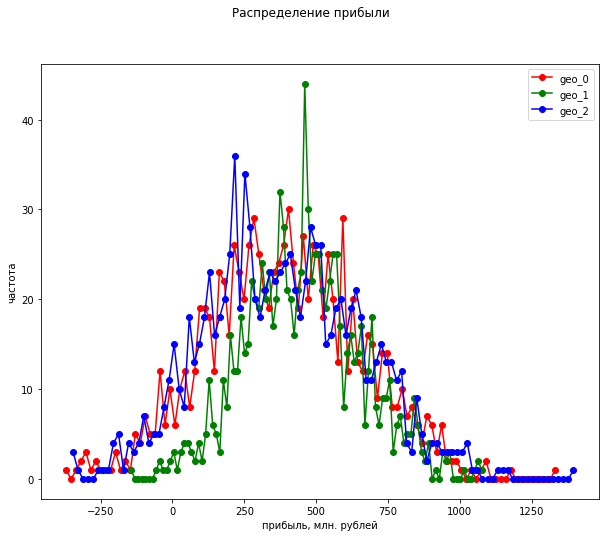

In [26]:
#распределение прибыли по 1000 выборок 
color = ['red', 'green', 'blue']

fig, axes = plt.subplots(1,1, figsize = (10,8))
plt.suptitle('Распределение прибыли');

#построение графиков
for i in range(len(geo)):
    hist, bin_edges = np.histogram(geo_values[i], bins = 100)
    axes.plot(bin_edges[:-1], hist, marker = 'o', color = color[i]);
    axes.set_xlabel('прибыль, млн. рублей');
    axes.set_ylabel('частота');
    axes.legend(geo_name);

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
Необычный график.. Мне кажется, что лучше без "пилы" выводить - просто столбцы гистограммы или график плотности. Но дело вкуса:)

Из рисунка видно, что распределение прибыли для региона geo_1 сдвинуто вправо по отношению к распределениям прибыли для регионов geo_0 и geo_2. Это означает, что средняя прибыль для geo_1 должна быть больше, а риски убытков - меньше.

In [27]:
#сведение всех данных в таблицу
geo_data_pivot = pd.concat([geo_data[0], geo_data[1], geo_data[2]], axis=1, join='inner')
geo_data_pivot

,geo_0,geo_1,geo_2
2.5%,-111.215546,78.050811,-112.227625
97.5%,909.766942,862.952060,934.562915
loss_prob,6.900000,0.700000,6.500000
mean,396.164985,461.155817,392.950475


**Выбор региона**

Опираясь на полученные данные, сделаем предложение о выборе региона. Из данных, представленных в таблице видно, что для регионов geo_0 и geo_1, вероятность убытков больше 2.5 процентов, т.е. разработка скважин в них слишком рискованна. В регионе же geo_1, вероятность убытков меньше 2.5%, ***Таким образом, для бурения скважин подходит регион geo_1, в котором и средняя прибыль выше чем в регионах geo_0 и geo_2 и вероятность убытков меньше 2.5%.***

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font><br>
<font color='green'><br>
Макс, всё по теме и в точку у тебя получилось)<BR> 
Результ, выводы и даже доверительный интервал - тот, что нужен, именно для прогноза.<br>
Хорошо с автоматизацией  визуализацией тебе удалось поработать.<br>
Единственное - значения 1000  в бутстрепе (и подобные константы) - лучше всегда выносить в глобальные переменные)<br>
    
Данный проект не простой. И не только тем, что задание с первого раза может показатья не понятным.
Но и потому, что его цель не просто построить прогноз по модели или прогноз продаж. А научиться выбирать лучшее управленческое решение на основе метода моделирования ситуации. Т.е. нужно было уйти чуть в сторону от классического моделирования как такового.
Бутсреп - он близок к методам управленческого моделирования монте-карло.
В этом ключе и есть смысл его рассматривать. Есть ещё одно направление в этой теме. Его продвигает российская компания - AnyLogic. И у неё есть хороший продукт с одноимённым названием. Мне приходилось как-то смотреть его... интересно. Можешь ролик из инета глянуть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и вообще моделирование с целью найти оптимальное решение - может по-другому "зайти"... <br>
    
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован